In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Reading the data

In [5]:
data=pd.read_csv('D:/Projects/Stock prices prediction using ARIMA/BAJFINANCE.csv',parse_dates=['Date'])

In [6]:
data.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
1,2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2,2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
3,2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
4,2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


Prv close:the close price of the previous day

open:open or first traded price of the day

Last:the last traded price(LTP) is the last traded price price when the marketingis closing 

Close price :The average of the traded prices in the last 30min.

VWAP=volume weighted average price

Turnover:undicates if there is liquidity in the market

Volume:the total volume traded or exchanged

Delivrable volume :delivered portion of the quantity  .

In [7]:
#Look to some general informations about the data
data.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
count,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5070.000000,5.070000e+03,5.070000e+03,2291.000000,4.624000e+03,4624.000000
mean,1311.476312,1312.330276,1334.300828,1289.349586,1312.278836,1312.154980,1312.440830,5.060571e+05,1.294532e+14,47105.843736,1.419690e+05,0.643712
std,1782.013137,1781.955970,1808.504414,1753.704145,1782.393446,1782.186659,1781.824954,1.798886e+06,4.906711e+14,101514.259444,3.495895e+05,0.233522
min,24.500000,25.200000,25.200000,24.500000,24.500000,24.500000,25.200000,3.000000e+00,1.047000e+07,21.000000,6.000000e+00,0.057500
25%,105.400000,104.275000,108.625000,100.725000,106.937500,107.725000,106.685000,4.697750e+03,6.755000e+10,1519.500000,4.745750e+03,0.478650
50%,536.375000,534.975000,552.000000,522.150000,536.400000,537.725000,537.990000,1.567200e+04,7.783766e+11,9603.000000,1.381950e+04,0.681950
75%,1757.525000,1764.012500,1784.600000,1740.550000,1760.037500,1757.750000,1758.297500,8.194950e+04,2.306237e+13,48836.000000,6.951800e+04,0.832850
max,11393.300000,11300.000000,11770.000000,11294.000000,11386.700000,11393.300000,11490.730000,2.596010e+07,8.787972e+15,979111.000000,3.690656e+06,1.000000


# Data analysis

How vwap varie over time?

In [8]:
#before that lets change the data to time indexed dataframe
data.set_index('Date',inplace=True)

In [9]:
data.dtypes

Symbol                 object
Series                 object
Prev Close            float64
Open                  float64
High                  float64
Low                   float64
Last                  float64
Close                 float64
VWAP                  float64
Volume                  int64
Turnover              float64
Trades                float64
Deliverable Volume    float64
%Deliverble           float64
dtype: object

In [10]:
data.head()

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2000-01-03,BAJAUTOFIN,EQ,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,BAJAUTOFIN,EQ,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,BAJAUTOFIN,EQ,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,BAJAUTOFIN,EQ,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,BAJAUTOFIN,EQ,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


<AxesSubplot:xlabel='Date'>

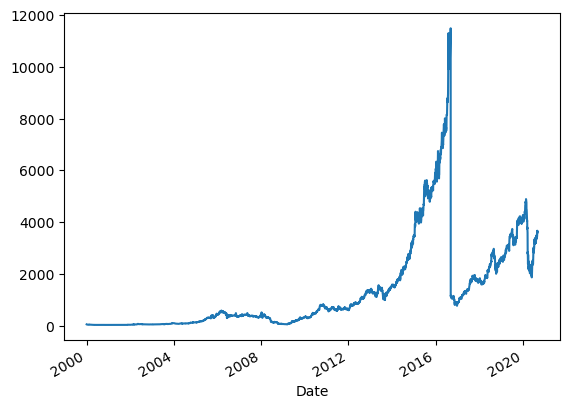

In [11]:
data['VWAP'].plot()

lets use plotlt and cufflinks to show an attractive plot

In [12]:
import cufflinks as cf
import plotly
from cufflinks.offline import go_offline
from plotly.offline import plot,iplot,download_plotlyjs,init_notebook_mode

In [13]:
cf.go_offline()

In [14]:
data['VWAP'].iplot()

In [15]:
data.corr()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Prev Close,1.000000,0.996672,0.996473,0.996441,0.996308,0.996321,0.996486,0.196424,0.246355,0.045690,0.205279,-0.442389
Open,0.996672,1.000000,0.999764,0.999777,0.999593,0.999603,0.999784,0.196562,0.247216,0.046071,0.204387,-0.442005
High,0.996473,0.999764,1.000000,0.999642,0.999824,0.999830,0.999901,0.200294,0.250926,0.051262,0.207607,-0.443786
Low,0.996441,0.999777,0.999642,1.000000,0.999767,0.999787,0.999882,0.192811,0.243461,0.039034,0.199377,-0.440894
Last,0.996308,0.999593,0.999824,0.999767,1.000000,0.999990,0.999918,0.197326,0.247953,0.045821,0.203699,-0.442978
Close,0.996321,0.999603,0.999830,0.999787,0.999990,1.000000,0.999935,0.197016,0.247638,0.045309,0.203427,-0.442874
VWAP,0.996486,0.999784,0.999901,0.999882,0.999918,0.999935,1.000000,0.196701,0.247388,0.045219,0.203426,-0.442765
Volume,0.196424,0.196562,0.200294,0.192811,0.197326,0.197016,0.196701,1.000000,0.970211,0.958355,0.849802,-0.489862
Turnover,0.246355,0.247216,0.250926,0.243461,0.247953,0.247638,0.247388,0.970211,1.000000,0.933469,0.777595,-0.484468
Trades,0.045690,0.046071,0.051262,0.039034,0.045821,0.045309,0.045219,0.958355,0.933469,1.000000,0.852756,-0.539084


In [16]:
print(data['Series'].unique())
print(data['Symbol'].unique())

['EQ']
['BAJAUTOFIN' 'BAJFINANCE']


we can se that the series feature has no effect on the target because it takes the same value for all the samples so we can drop that column

The feature Symbol takes two values lets label encode it

In [17]:
#drop the series column
data.drop(columns=['Series'],inplace=True)

In [18]:
#Label encoding of Symbol feature
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
data['Symbol']=labelencoder.fit_transform(data['Symbol'])
data.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,
2000-01-03,0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600,3.803800e+10,NaN,NaN,NaN
2000-01-04,0,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000,2.428000e+10,NaN,NaN,NaN
2000-01-05,0,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500,1.591450e+10,NaN,NaN,NaN
2000-01-06,0,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200,2.754750e+10,NaN,NaN,NaN
2000-01-07,0,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500,1.555550e+10,NaN,NaN,NaN


# Dealing with missing values

Use the Knn method to impute the missing values

In [19]:
data.isnull().sum()

Symbol                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [20]:
from fancyimpute import KNN

In [21]:
#calling the KNN class
knn_imputer=KNN(3)
#imputing the missing values
df=knn_imputer.fit_transform(data)

Imputing row 1/5070 with 3 missing, elapsed time: 2.803
Imputing row 101/5070 with 3 missing, elapsed time: 2.815
Imputing row 201/5070 with 3 missing, elapsed time: 2.821
Imputing row 301/5070 with 3 missing, elapsed time: 2.827
Imputing row 401/5070 with 3 missing, elapsed time: 2.833
Imputing row 501/5070 with 1 missing, elapsed time: 2.837
Imputing row 601/5070 with 1 missing, elapsed time: 2.839
Imputing row 701/5070 with 1 missing, elapsed time: 2.841
Imputing row 801/5070 with 1 missing, elapsed time: 2.844
Imputing row 901/5070 with 1 missing, elapsed time: 2.846
Imputing row 1001/5070 with 1 missing, elapsed time: 2.848
Imputing row 1101/5070 with 1 missing, elapsed time: 2.850
Imputing row 1201/5070 with 1 missing, elapsed time: 2.853
Imputing row 1301/5070 with 1 missing, elapsed time: 2.855
Imputing row 1401/5070 with 1 missing, elapsed time: 2.857
Imputing row 1501/5070 with 1 missing, elapsed time: 2.860
Imputing row 1601/5070 with 1 missing, elapsed time: 2.862
Imputing 

In [22]:
#The output is an array we need to convert it to a dataframe
df=pd.DataFrame(df)
df.columns=data.columns
df.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0.0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600.0,3.803800e+10,24.142986,4648.027918,0.868162
1,0.0,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000.0,2.428000e+10,27.470615,3153.118685,0.854168
2,0.0,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,22.613592,3443.042316,0.992177
3,0.0,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,28.244572,4759.577502,0.734474
4,0.0,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,22.444223,1457.756932,0.534701


In [23]:
df.isna().sum()

Symbol                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

# Preparing the data for Arima

In [24]:
data.columns

Index(['Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble'],
      dtype='object')

In [25]:
window1=3
wondow2=7

In [27]:
data.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,0.0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600.0,3.803800e+10,24.142986,4648.027918,0.868162
1,0.0,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000.0,2.428000e+10,27.470615,3153.118685,0.854168
2,0.0,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,22.613592,3443.042316,0.992177
3,0.0,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,28.244572,4759.577502,0.734474
4,0.0,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,22.444223,1457.756932,0.534701


In [29]:
lag_features=['High','Low','VWAP','Volume','Turnover','Trades']

In [30]:
for feature in lag_features:
    df[feature+'lag_win3_mean']=df[feature].rolling(window=window1).mean()
    df[feature+'lag_win3_std']=df[feature].rolling(window=window1).std()


In [31]:
df.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highlag_win3_mean,Highlag_win3_std,Lowlag_win3_mean,Lowlag_win3_std,VWAPlag_win3_mean,VWAPlag_win3_std,Volumelag_win3_mean,Volumelag_win3_std,Turnoverlag_win3_mean,Turnoverlag_win3_std,Tradeslag_win3_mean,Tradeslag_win3_std
0,0.0,46.95,49.45,50.75,46.5,50.75,50.75,50.05,7600.0,3.803800e+10,24.142986,4648.027918,0.868162,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,50.75,53.20,53.20,47.9,48.00,48.10,48.56,5000.0,2.428000e+10,27.470615,3153.118685,0.854168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.0,48.10,46.55,47.40,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,22.613592,3443.042316,0.992177,50.450000,2.911615,46.333333,1.656301,48.026667,2.336115,5366.666667,2074.447718,2.607750e+10,1.117075e+10,24.742397,2.483372
3,0.0,44.60,43.50,46.00,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,28.244572,4759.577502,0.734474,48.866667,3.817504,44.866667,2.909181,46.153333,2.148123,4900.000000,1352.774926,2.258067e+10,5.999789e+09,26.109593,3.052257
4,0.0,45.25,48.00,48.00,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,22.444223,1457.756932,0.534701,47.133333,1.026320,42.900000,1.473092,44.780000,0.597578,4400.000000,1558.845727,1.967250e+10,6.822312e+09,24.434129,3.301027


In [32]:
for feature in lag_features:
    df[feature+'lag_win7_mean']=df[feature].rolling(window=window1).mean()
    df[feature+'lag_win7_std']=df[feature].rolling(window=window1).std()


In [34]:
df.shape

(5070, 37)

In [35]:
df.isnull().sum()

Symbol                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highlag_win3_mean        2
Highlag_win3_std         2
Lowlag_win3_mean         2
Lowlag_win3_std          2
VWAPlag_win3_mean        2
VWAPlag_win3_std         2
Volumelag_win3_mean      2
Volumelag_win3_std       2
Turnoverlag_win3_mean    2
Turnoverlag_win3_std     2
Tradeslag_win3_mean      2
Tradeslag_win3_std       2
Highlag_win7_mean        2
Highlag_win7_std         2
Lowlag_win7_mean         2
Lowlag_win7_std          2
VWAPlag_win7_mean        2
VWAPlag_win7_std         2
Volumelag_win7_mean      2
Volumelag_win7_std       2
Turnoverlag_win7_mean    2
Turnoverlag_win7_std     2
Tradeslag_win7_mean      2
Tradeslag_win7_std       2
d

In [39]:
df.dropna(inplace=True)
df.head()

,Symbol,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble,Highlag_win3_mean,Highlag_win3_std,Lowlag_win3_mean,Lowlag_win3_std,VWAPlag_win3_mean,VWAPlag_win3_std,Volumelag_win3_mean,Volumelag_win3_std,Turnoverlag_win3_mean,Turnoverlag_win3_std,Tradeslag_win3_mean,Tradeslag_win3_std,Highlag_win7_mean,Highlag_win7_std,Lowlag_win7_mean,Lowlag_win7_std,VWAPlag_win7_mean,VWAPlag_win7_std,Volumelag_win7_mean,Volumelag_win7_std,Turnoverlag_win7_mean,Turnoverlag_win7_std,Tradeslag_win7_mean,Tradeslag_win7_std
2,0.0,48.10,46.55,47.4,44.6,44.60,44.60,45.47,3500.0,1.591450e+10,22.613592,3443.042316,0.992177,50.450000,2.911615,46.333333,1.656301,48.026667,2.336115,5366.666667,2074.447718,2.607750e+10,1.117075e+10,24.742397,2.483372,50.450000,2.911615,46.333333,1.656301,48.026667,2.336115,5366.666667,2074.447718,2.607750e+10,1.117075e+10,24.742397,2.483372
3,0.0,44.60,43.50,46.0,42.1,46.00,45.25,44.43,6200.0,2.754750e+10,28.244572,4759.577502,0.734474,48.866667,3.817504,44.866667,2.909181,46.153333,2.148123,4900.000000,1352.774926,2.258067e+10,5.999789e+09,26.109593,3.052257,48.866667,3.817504,44.866667,2.909181,46.153333,2.148123,4900.000000,1352.774926,2.258067e+10,5.999789e+09,26.109593,3.052257
4,0.0,45.25,48.00,48.0,42.0,42.90,42.90,44.44,3500.0,1.555550e+10,22.444223,1457.756932,0.534701,47.133333,1.026320,42.900000,1.473092,44.780000,0.597578,4400.000000,1558.845727,1.967250e+10,6.822312e+09,24.434129,3.301027,47.133333,1.026320,42.900000,1.473092,44.780000,0.597578,4400.000000,1558.845727,1.967250e+10,6.822312e+09,24.434129,3.301027
5,0.0,42.90,42.05,44.9,41.0,43.00,42.90,42.47,4700.0,1.996100e+10,24.999700,565.366893,0.524376,46.300000,1.571623,41.700000,0.608276,43.780000,1.134504,4800.000000,1352.774926,2.102133e+10,6.065909e+09,25.229499,2.906995,46.300000,1.571623,41.700000,0.608276,43.780000,1.134504,4800.000000,1352.774926,2.102133e+10,6.065909e+09,25.229499,2.906995
6,0.0,42.90,42.00,42.0,39.5,40.25,40.10,40.25,5500.0,2.213900e+10,26.369734,2468.603768,0.811512,44.966667,3.000556,40.833333,1.258306,42.386667,2.096243,4566.666667,1006.644591,1.921850e+10,3.353967e+09,24.604553,1.992364,44.966667,3.000556,40.833333,1.258306,42.386667,2.096243,4566.666667,1006.644591,1.921850e+10,3.353967e+09,24.604553,1.992364


# Splitting the data


In [40]:
train_data=df[0:4000]
test_data=df[4000:]

# Training

In [3]:
from pmdarima import auto_arima

In [41]:
model =auto_arima(y=train_data['VWAP'],X=train_data.drop(columns='VWAP'))

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1906: RuntimeWarning:

divide by zero encountered in reciprocal

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:1899: RuntimeWarning:


In [43]:
model.fit(train_data['VWAP'],train_data.drop(columns=['VWAP']))

ARIMA(order=(3, 0, 2), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [45]:
predictions=model.predict(n_periods=len(test_data),X=test_data.drop(columns=['VWAP']))

C:\Users\ASUS TUF\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.



In [46]:
predictions

4000    7424.920796
4001    7420.215454
4002    7621.874050
4003    7697.446294
4004    7776.102543
           ...     
5063    3578.791853
5064    3767.277055
5065    3714.414432
5066    3734.004139
5067    3602.327698
Length: 1068, dtype: float64

In [48]:
test_data['Forecast']=predictions

Model Evaluation

In [63]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [54]:
test_data.columns

Index(['Symbol', 'Prev Close', 'Open', 'High', 'Low', 'Last', 'Close', 'VWAP',
       'Volume', 'Turnover', 'Trades', 'Deliverable Volume', '%Deliverble',
       'Highlag_win3_mean', 'Highlag_win3_std', 'Lowlag_win3_mean',
       'Lowlag_win3_std', 'VWAPlag_win3_mean', 'VWAPlag_win3_std',
       'Volumelag_win3_mean', 'Volumelag_win3_std', 'Turnoverlag_win3_mean',
       'Turnoverlag_win3_std', 'Tradeslag_win3_mean', 'Tradeslag_win3_std',
       'Highlag_win7_mean', 'Highlag_win7_std', 'Lowlag_win7_mean',
       'Lowlag_win7_std', 'VWAPlag_win7_mean', 'VWAPlag_win7_std',
       'Volumelag_win7_mean', 'Volumelag_win7_std', 'Turnoverlag_win7_mean',
       'Turnoverlag_win7_std', 'Tradeslag_win7_mean', 'Tradeslag_win7_std',
       'Forecast'],
      dtype='object')

In [55]:
test_data.isnull().sum()

Symbol                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                   0
Deliverable Volume       0
%Deliverble              0
Highlag_win3_mean        0
Highlag_win3_std         0
Lowlag_win3_mean         0
Lowlag_win3_std          0
VWAPlag_win3_mean        0
VWAPlag_win3_std         0
Volumelag_win3_mean      0
Volumelag_win3_std       0
Turnoverlag_win3_mean    0
Turnoverlag_win3_std     0
Tradeslag_win3_mean      0
Tradeslag_win3_std       0
Highlag_win7_mean        0
Highlag_win7_std         0
Lowlag_win7_mean         0
Lowlag_win7_std          0
VWAPlag_win7_mean        0
VWAPlag_win7_std         0
Volumelag_win7_mean      0
Volumelag_win7_std       0
Turnoverlag_win7_mean    0
Turnoverlag_win7_std     0
Tradeslag_win7_mean      0
Tradeslag_win7_std       0
F

In [58]:
test_data.dropna(inplace=True)

In [59]:
mean_squared_error(y_true=test_data['VWAP'],y_pred=test_data['Forecast'])

201759.5381175119

In [64]:
mean_absolute_error(y_true=test_data['VWAP'],y_pred=test_data['Forecast'])

95.89461785516454

<AxesSubplot:>

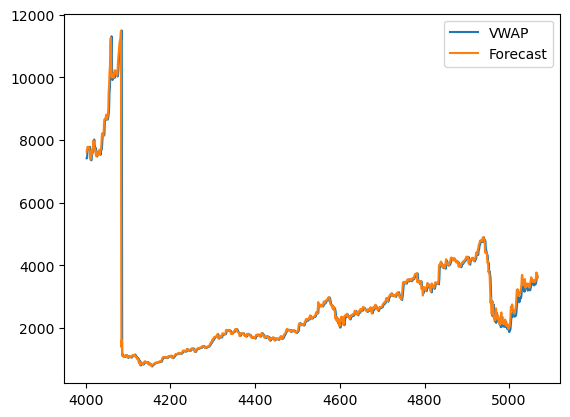

In [60]:
test_data[['VWAP','Forecast']].plot()